# Solution to Homework 3

**Prompt:**
Submit an Jupyter notebook (.ipynb file) which uses a decision tree to analyzes the "San Carlos Mud Slide" case in DMD 2.14. The case statement is unclear, but it is implicitly asking for how much should the mayor be willing to pay for the test?

In the Jupyter notebook, graph a decision tree with the values of each node shown.Take the difference between the cost of the NoTest node and Test node to be how much the test is worth. Finally, as sensitivity analysis, create a plot of the value of the test as a function of the probability of a mud slide, as the probability ranges from 0.1% to 10% (similar to the last plot in the course note to session 3-decision trees).

**Sample Solution:**
We first draw the decision tree by hand and then code it into Python. The final tree looks like this: 

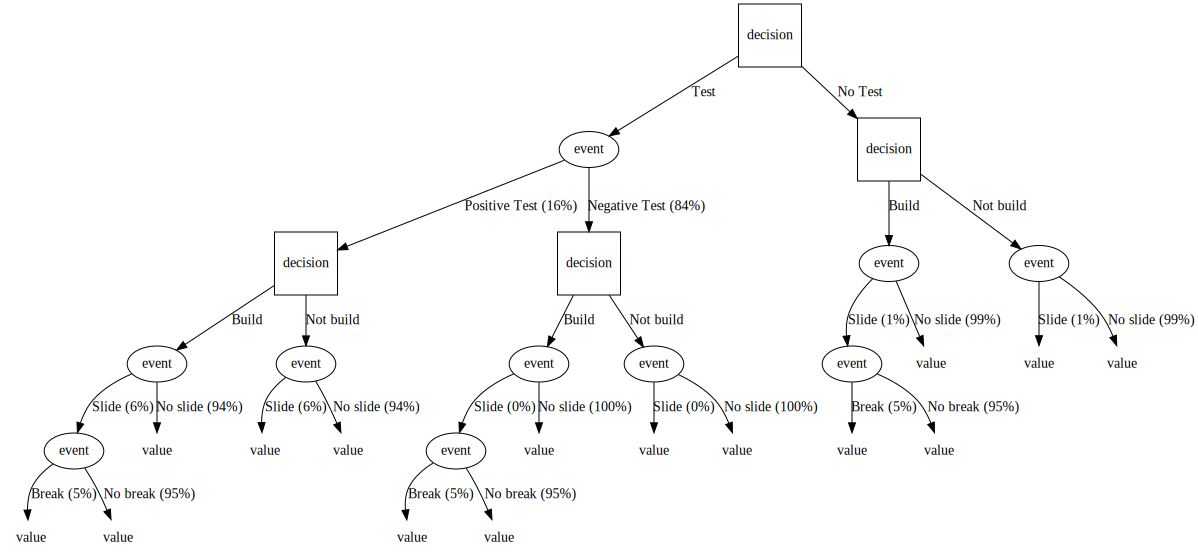

For ease of keeping track, we adopt the following naming convention, with letters going in the following order.

- T for test, TP for positive test, TN for negative test, E for no test.
- B for build, N for no build.
- S for slide, W for no slide

It is possible simple to code up the tree exactly one node at a time. However, this is cumbersome as there are many nodes. In this sample solution, I will demonstrate two techniques for simplifying the tree. **These simplifications are not necessary but are only to reduce our work load.**

## Simplification 1: Substituting in the Expected Value for Final Events
First, to simplify the tree, note that if we build the wall and there is a slide, the expected cost we get is 
$(-1040)(0.05) + (-40)(.95) = -90.$ There are no decisions that follow this event, so it is correct to simply replace this subtree with its expected value. This saves us the need to draw the following whenever there is a slide and the wall breaks.

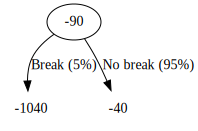

In [23]:
from decisiontrees import Node
BS1=Node('Break',value=-1040)
BS2=Node('No break',value=-40)
BS=Node('Built Wall but slide occured',[BS1,BS2],[.05,.95])
display(BS.graph())

Rather, we can replace it with one node, for example  `BS=Node('Built Wall but slide occured',value=-90)`. 

## Simplification 2: Using Functions to Build Repetitive Structure

Since we will be varying the probability of sliding, we have that as an input to the function that builds the tree. Furthermore, we note that the tree has 

In [24]:
from decisiontrees import Node

def buildBranch(branchName,probSlideInBranch):
    #BS1=Node('Break',value=-1040)
    #BS2=Node('No break',value=-40)
    #BS=Node('Slide',[BS1,BS2],[.05,.95])
    BS=Node('Slide',value=-90)       # Simplification of node as explained above.
    BW=Node('No slide',value=-40)
    B=Node('Build',[BS,BW],[probSlideInBranch,1-probSlideInBranch])
    
    NS=Node('Slide',value=-1000)
    NW=Node('No slide',value=0)
    N=Node('Not build',[NS,NW],[probSlideInBranch,1-probSlideInBranch])
    return Node(branchName,[B,N])

def buildTree(probSlide=.01):
    probPosTest=.9*probSlide+.15*(1-probSlide)
    probNegTest=.1*probSlide+.85*(1-probSlide)
    probSlideCondPosTest=.9*probSlide/probPosTest
    probSlideCondNegTest=.1*probSlide/probNegTest
   
    # build the three similar branches as in the above defined function
    TP=buildBranch('Positive Test',probSlideCondPosTest)     
    TN=buildBranch('Negative Test',probSlideCondNegTest)
    E=buildBranch('No Test',probSlide)
    
    T=Node('Test',[TP,TN],[probPosTest,probNegTest])
    root=Node('Root',[T,E])
    return root



## Value of the Test 

The graph of the tree and the print out description is as below. Note that the `decisiontrees.py` module automatically rounds every value in the graph to the nearest whole number, and every probability to 2 significant digits. However, this is only for ease of display. Inside the computer, the underlying probabilities and values are correct up to at least 10 decimal places. 

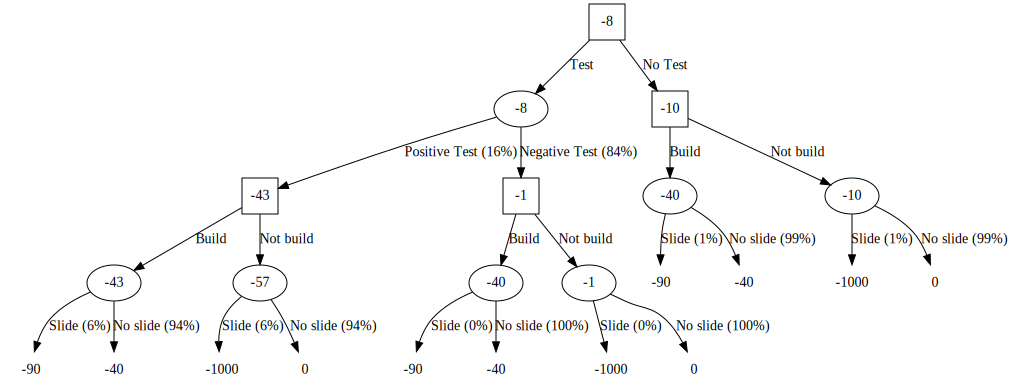

Root, DECISION node with value -7.75
--> Option 1: Test, EVENT node with value -7.75 (Optimal decision for node Root)
    --> w.p. 0.16: Positive Test, DECISION node with value -42.86
        --> Option 1: Build, EVENT node with value -42.86 (Optimal decision for node Positive Test)
            --> w.p. 0.06: Slide, VALUE node with value -90.00
            --> w.p. 0.94: No slide, VALUE node with value -40.00
        --> Option 2: Not build, EVENT node with value -57.14
            --> w.p. 0.06: Slide, VALUE node with value -1000.00
            --> w.p. 0.94: No slide, VALUE node with value 0.00
    --> w.p. 0.84: Negative Test, DECISION node with value -1.19
        --> Option 1: Build, EVENT node with value -40.06
            --> w.p. 0.00: Slide, VALUE node with value -90.00
            --> w.p. 1.00: No slide, VALUE node with value -40.00
        --> Option 2: Not build, EVENT node with value -1.19 (Optimal decision for node Negative Test)
            --> w.p. 0.00: Slide, VALUE n

In [25]:
tree=buildTree()
display(tree.graph())
print(tree)

The difference betweening testing and not testing is as follows:

In [14]:
tree=buildTree()
T,E=tree.children
print('Test is worth ${0:.2f} dollars'.format((T.evaluate()-E.evaluate())*1000))

Test is worth $2250.00 dollars


## Sensitivity Analysis
The sensitivity analysis is as follows. 

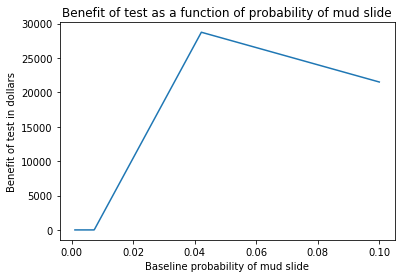

In [31]:
import matplotlib.pyplot as plt
import numpy as np
probList=np.linspace(0.001,.1,1000)
diffList=[]
for prob in probList:
    T,E=buildTree(prob).children
    diffList.append((T.evaluate()-E.evaluate())*1000)
plt.plot(probList,diffList)
plt.xlabel('Baseline probability of mud slide')
plt.ylabel('Benefit of test in dollars')
plt.title('Benefit of test as a function of probability of mud slide')
plt.show()

As can be seen, the test is worth the most when the probability of mud slide is about 4%.

# Additional Analysis
**The following analysis is not asked for by the homework text but helps us better understand what's going on.**

We want to understand why there is a kink when the probability of slide is $p=0.005$, and another around $p=0.04$. To do this, we simply graph the three around the three kinks, say at $p=0.001$, $p=0.03$ and $p=0.05$.


In [32]:
print('At p=0.001',buildTree(0.001),'\n')
print('At p=0.03',buildTree(0.03),'\n')
print('At p=0.05',buildTree(0.05),'\n')


At p=0.001 Root, DECISION node with value -1.00
--> Option 1: Test, EVENT node with value -1.00
    --> w.p. 0.15: Positive Test, DECISION node with value -5.97
        --> Option 1: Build, EVENT node with value -40.30
            --> w.p. 0.01: Slide, VALUE node with value -90.00
            --> w.p. 0.99: No slide, VALUE node with value -40.00
        --> Option 2: Not build, EVENT node with value -5.97 (Optimal decision for node Positive Test)
            --> w.p. 0.01: Slide, VALUE node with value -1000.00
            --> w.p. 0.99: No slide, VALUE node with value 0.00
    --> w.p. 0.85: Negative Test, DECISION node with value -0.12
        --> Option 1: Build, EVENT node with value -40.01
            --> w.p. 0.00: Slide, VALUE node with value -90.00
            --> w.p. 1.00: No slide, VALUE node with value -40.00
        --> Option 2: Not build, EVENT node with value -0.12 (Optimal decision for node Negative Test)
            --> w.p. 0.00: Slide, VALUE node with value -1000.00


As can be seen, the optimal strategy is different in each of the three regions separated by the kinks. When the probability of slide is very small (0.001), we will not build a wall even if the test returns positive, so there's no reason to do the test. When the probability of slide is larger (past the first kink), we will build a wall if the test returns positive, but not build if the test is negative, so the test has some value. When the probability of slide is larger than about 4%, then the optimal decision without the test changes from not building to building, which creates the kink that we see. If we had continued the analysis and tested large probabilities of sliding, then the optimal decision would be to build the wall anyway even if the test is negative, so the test would have no value again.
